In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = False
mpl.rcParams.update({'font.size': 9})

age = 13.800797497330507

In [2]:
path = '../../Data/ram_pressure.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])
print('Available keys:', *keys)

Available keys: h148_13 h148_28 h148_37 h148_68 h229_20 h229_22 h242_24 h242_80


In [5]:
key = 'h242_80'
data = pd.read_hdf(path, key=key)

In [6]:
data

,t,a,h1dist,Rvir,M_star,M_gas,hostRvir,vel_CGM,rho_CGM,Pram,vel_CGM_adv,rho_CGM_adv,Pram_adv,M_host_enc,m_sat_enc,r_R,Prest
0,6.474131,0.537186,335.745475,35.424284,21180702.264257893,306591002.84246165,165.382022,78.467036,141.195634,8.693522e+05,81.313723,1282.4816610973353,8479668.227082064,453090298817.64966,2856779342.6106806,48.318164385273384,1003201372.8676269
0,6.797366,0.556858,335.409272,37.009154,21772898.062069662,293384075.5817517,169.778673,85.896725,127.197746,9.384964e+05,83.784308,875.3242415109665,6144610.129734436,479950565012.3908,3038904385.1922264,50.40910383737213,2034924027.59482
0,7.039793,0.571574,322.893817,38.189591,22657881.341533806,270645811.7885533,173.320693,90.638983,141.681948,1.163977e+06,75.588154,640.9406566382094,3662058.6406291723,449618869820.9937,3035211085.5307894,50.91786833808799,598381597.9382071
0,7.120602,0.576474,317.849605,38.576524,22620362.914496478,261195903.1219669,174.917101,92.477172,143.958215,1.231135e+06,71.235718,601.830130239349,3054003.5333643667,425740863535.8842,3019845006.309317,50.59217018160457,358637095.75430506
0,7.443837,0.596056,300.443808,40.546602,22996048.16361586,254992741.70887217,180.718230,102.973694,166.301162,1.763388e+06,71.636184,486.37183461513155,2495935.2164168423,413284972380.0055,3056091204.290665,52.44316545834664,143893179.61739567
0,7.767072,0.615628,279.423386,42.123208,23256155.442389533,240370591.32371187,186.915490,114.674380,211.410266,2.780090e+06,86.020790,429.19336762492946,3175849.0560541786,408373786962.74536,3248164596.365155,53.17425023455624,352146606.25467527
0,8.090307,0.635208,256.441806,43.397356,23515452.440592084,212585001.06446227,193.441606,128.562685,263.794312,4.360088e+06,102.170221,642.1694162763313,6703448.559068114,445964763599.4379,3368850188.798593,55.73263128456037,251312128.71888885
0,8.413543,0.654817,220.685629,44.766021,23854415.351543024,188110431.65293837,200.485683,145.692529,394.931068,8.382930e+06,119.642984,710.2820414052104,10167292.315423608,403834098016.42914,3422787741.312912,55.32602813093422,446147453.10280216
0,8.608831,0.666686,198.558042,45.508536,23889186.853506677,180006321.05732015,205.172078,157.241401,533.230100,1.318404e+07,125.646481,814.4601589496906,12857913.6969574,435418133996.4932,3449406806.5939426,57.524593678878,314823906.39927816
0,8.736778,0.674473,182.687017,45.990319,24003692.277429048,173186558.77890927,208.115895,167.042814,599.813635,1.673678e+07,136.890177,1197.560200087806,22440985.404102303,387863920074.67615,3461488663.3960476,55.86998679955231,1147667375.511364


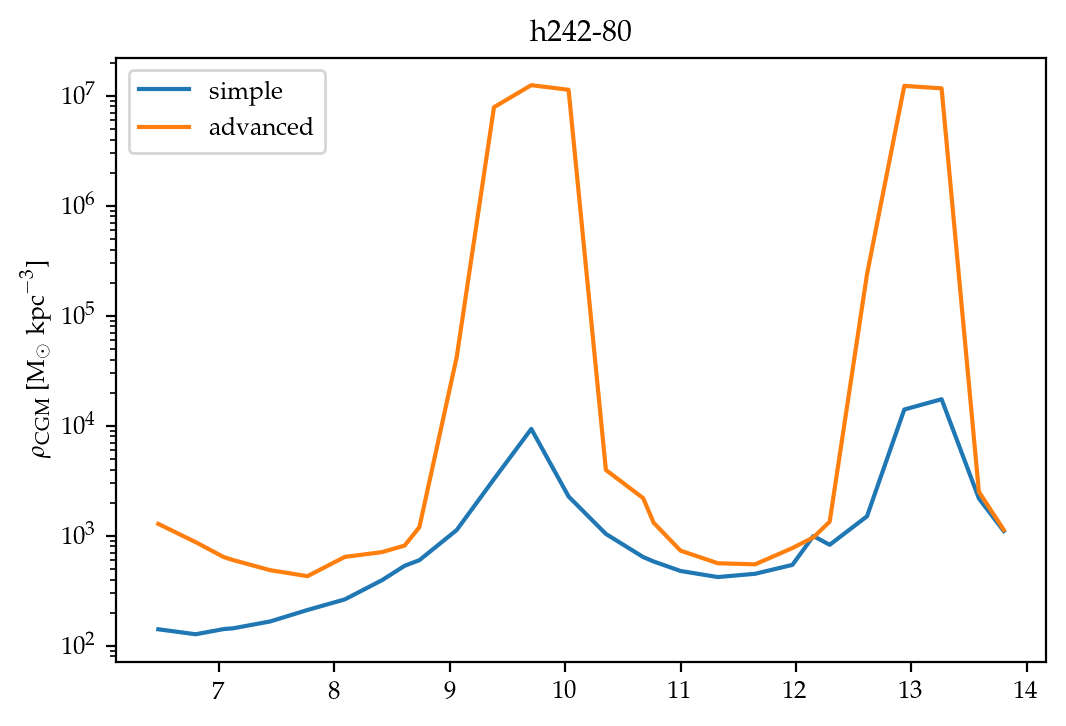

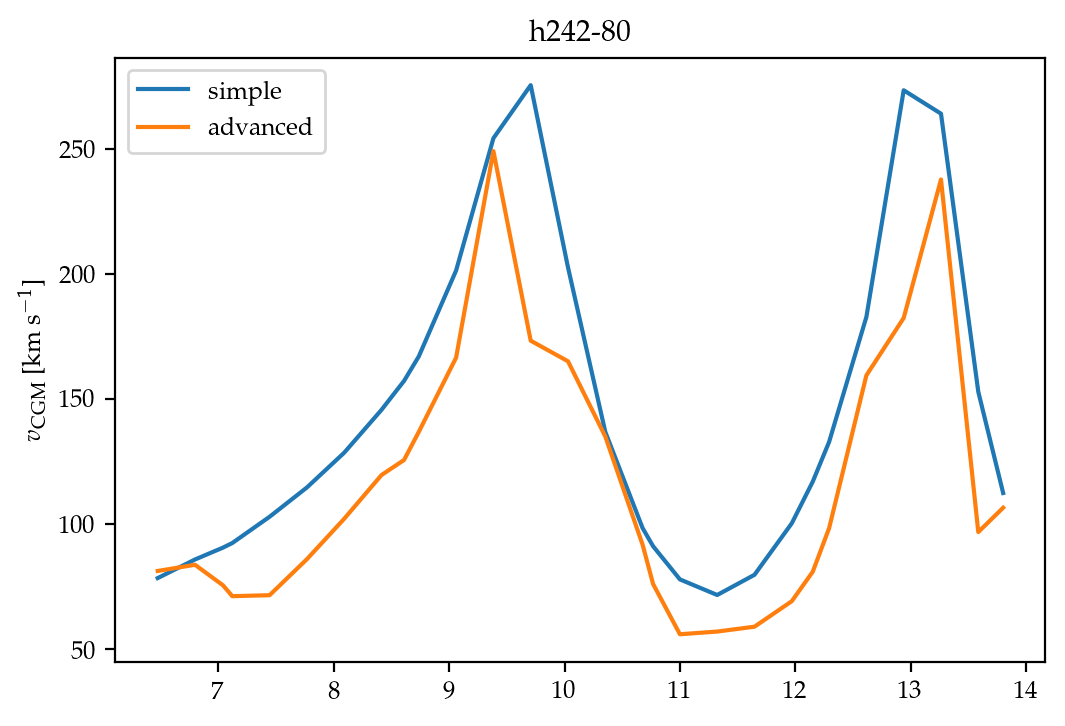

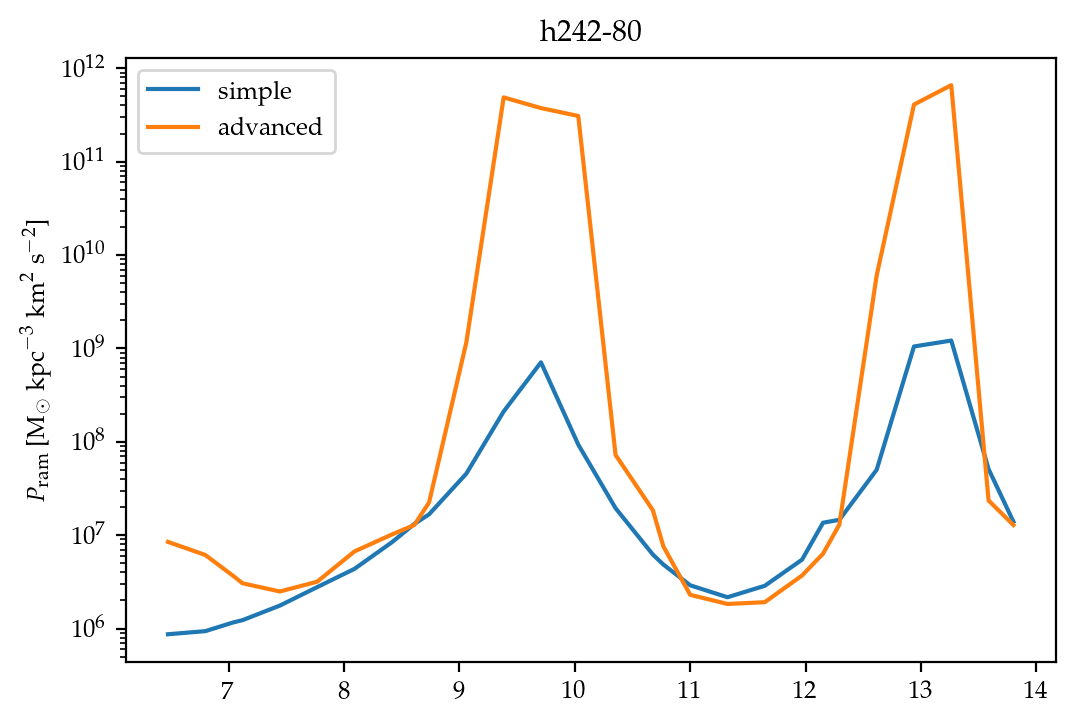

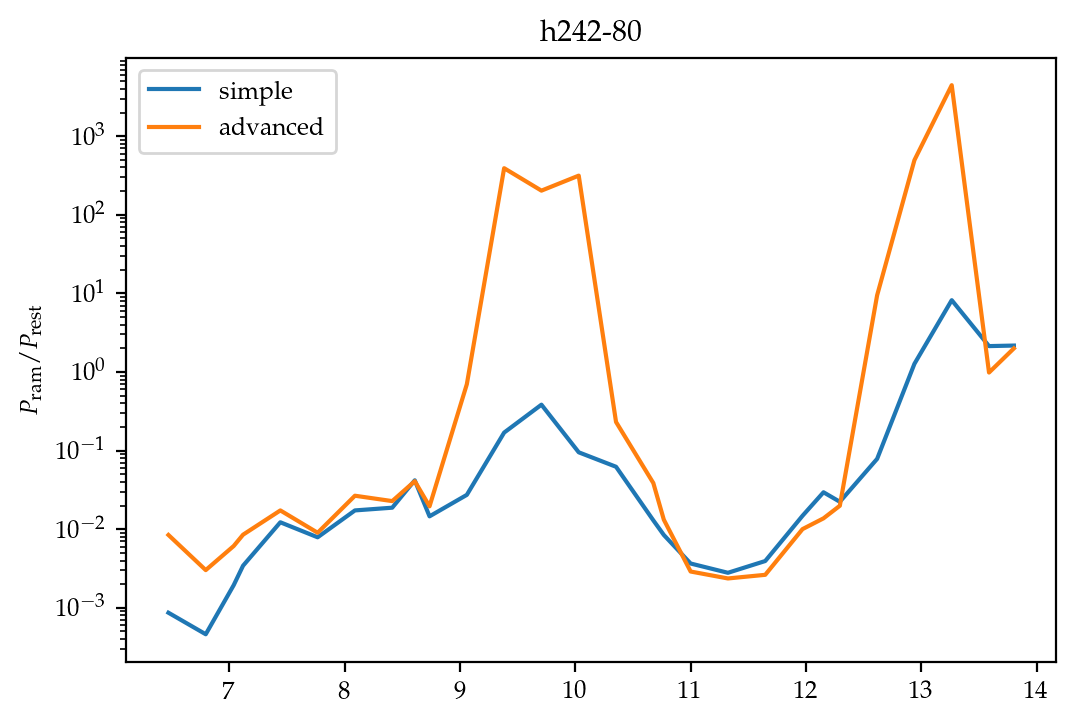

In [7]:
plt.figure(dpi=200)
plt.title(key.replace('_','-'))
plt.ylabel(r'$\rho_{\rm CGM}$ [M$_{\odot}~\mathrm{kpc}^{-3}$]')
plt.plot(data.t, data.rho_CGM, label='simple')
plt.plot(data.t, data.rho_CGM_adv, label='advanced')
plt.semilogy()
plt.legend()
plt.show()

plt.figure(dpi=200)
plt.title(key.replace('_','-'))
plt.ylabel(r'$v_{\rm CGM}$ [km~s$^{-1}$]')
plt.plot(data.t, data.vel_CGM, label='simple')
plt.plot(data.t, data.vel_CGM_adv, label='advanced')
plt.legend()
plt.show()

plt.figure(dpi=200)
plt.title(key.replace('_','-'))
plt.ylabel(r'$P_{\rm ram}$ [M$_{\odot}~\mathrm{kpc}^{-3}~\mathrm{km}^2~\mathrm{s}^{-2}$]')
plt.plot(data.t, data.Pram, label='simple')
plt.plot(data.t, data.Pram_adv, label='advanced')
plt.semilogy()
plt.legend()
plt.show()


plt.figure(dpi=200)
plt.title(key.replace('_','-'))
plt.ylabel(r'$P_{\rm ram} / P_{\rm rest}$')
plt.plot(data.t, np.array(data.Pram)/np.array(data.Prest), label='simple')
plt.plot(data.t, np.array(data.Pram_adv)/np.array(data.Prest), label='advanced')
plt.semilogy()
plt.legend()
plt.show()

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


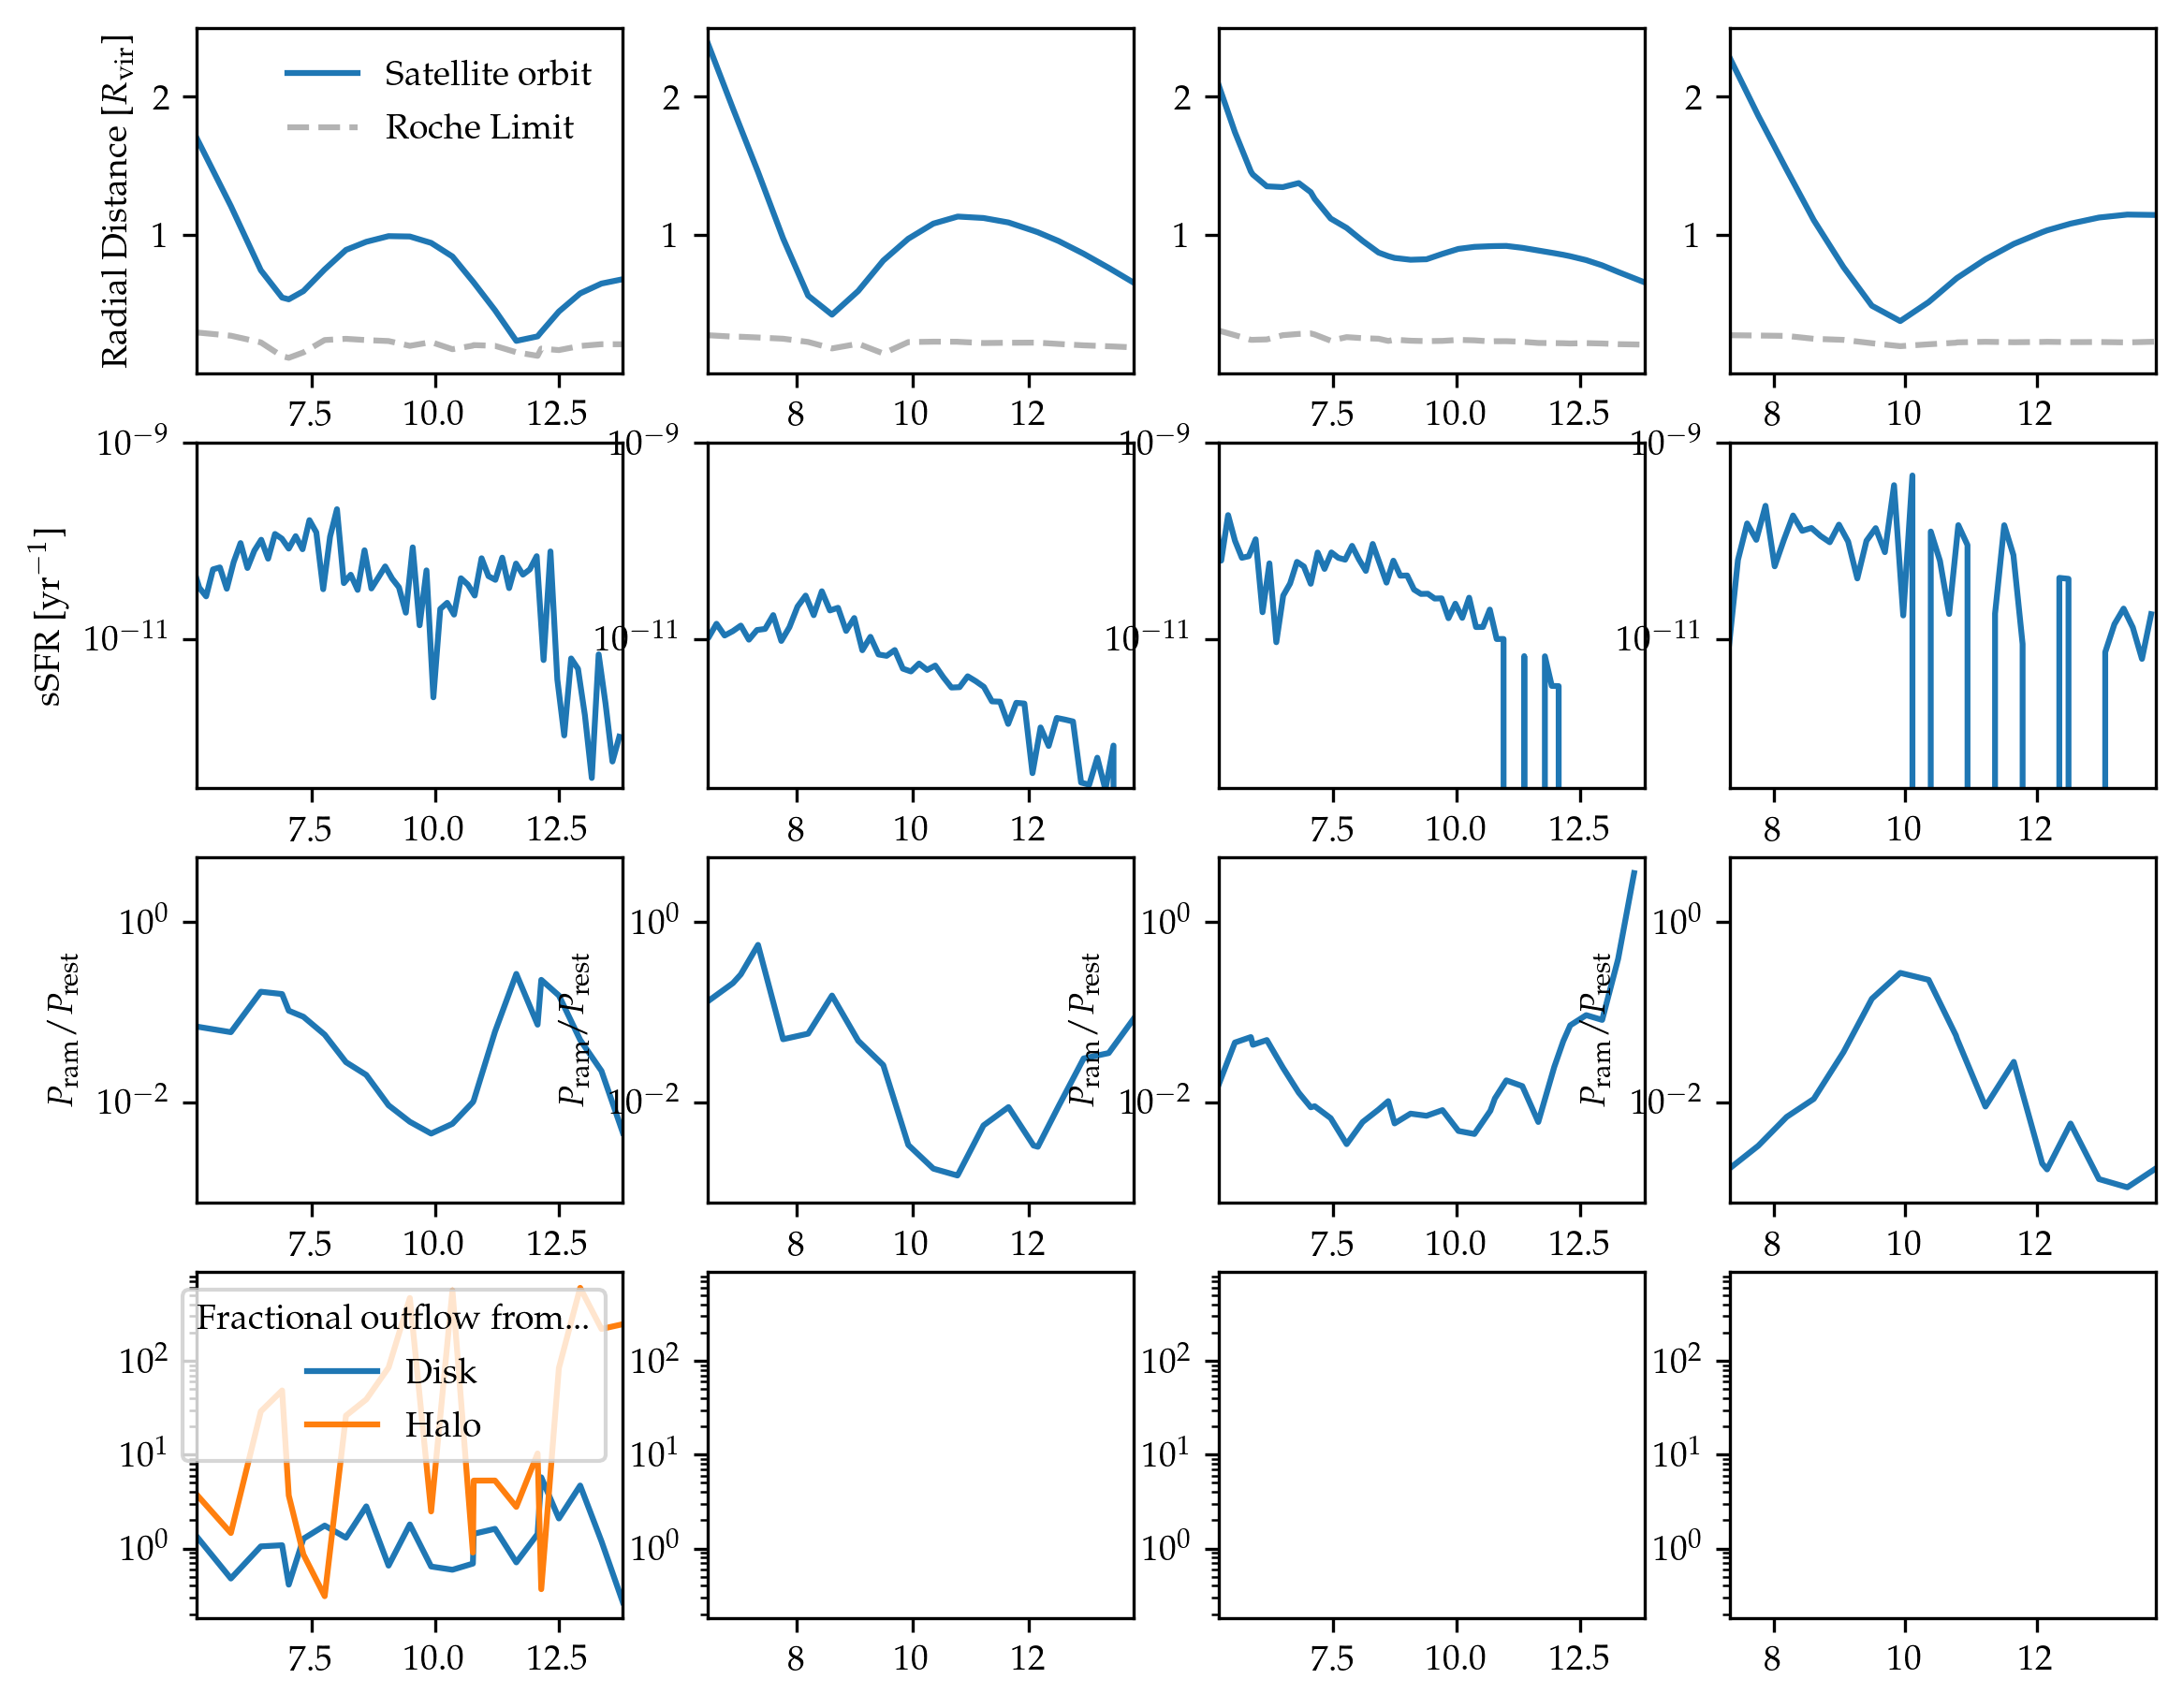

In [12]:
fig = plt.figure(dpi=300, figsize=(9,7.5))
gs = mpl.gridspec.GridSpec(4,4,figure=fig)

###############################################
key = 'h148_28'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,0])
ax_sSFR = plt.subplot(gs[1,0], sharex=ax_dist)
ax_Pram = plt.subplot(gs[2,0], sharex=ax_dist)
ax_flow = plt.subplot(gs[3,0], sharex=ax_dist)

ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')
ax_dist.set_ylabel(r'Radial Distance [$R_{\rm vir}$]')
ax_dist.legend(frameon=False)


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)
ax_sSFR.set_ylabel(r'sSFR [yr$^{-1}$]')


ax_Pram.plot(data.t, np.array(data.Pram)/np.array(data.Prest), label='simple')
# ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()
ax_Pram.set_ylabel(r'$P_{\rm ram}/P_{\rm rest}$')


transfers = pd.read_hdf('../../Data/transfers.hdf5', key=key)
rates = transfers.groupby(['t2','between'])['massrate'].sum()
rates = pd.DataFrame(rates).reset_index()
    
r1 = rates[rates.between=='satdisk_sathalo']
r2 = rates[rates.between=='sathalo_satdisk']
y = np.array(r1.massrate)/np.array(r2.massrate)
ax_flow.plot(r1.t2, y, label='Disk')

r1 = rates[rates.between=='sathalo_hosthalo']
r2 = rates[rates.between=='hosthalo_sathalo']
y = np.array(r1.massrate)/np.array(r2.massrate)
ax_flow.plot(r1.t2, y, label='Halo')
    
    
ax_flow.legend(title='Fractional outflow from...')
ax_flow.semilogy()



###############################################
key = 'h148_13'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,1], sharey=ax_dist)
ax_sSFR = plt.subplot(gs[1,1], sharex=ax_dist, sharey=ax_sSFR)
ax_Pram = plt.subplot(gs[2,1], sharex=ax_dist, sharey=ax_Pram)
ax_flow = plt.subplot(gs[3,1], sharex=ax_dist, sharey=ax_flow)

ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)


ax_Pram.plot(data.t, np.array(data.Pram)/np.array(data.Prest), label='simple')
# ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()
ax_Pram.set_ylabel(r'$P_{\rm ram}/P_{\rm rest}$')





###############################################
key = 'h242_24'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,2], sharey=ax_dist)
ax_sSFR = plt.subplot(gs[1,2], sharex=ax_dist, sharey=ax_sSFR)
ax_Pram = plt.subplot(gs[2,2], sharex=ax_dist, sharey=ax_Pram)
ax_flow = plt.subplot(gs[3,2], sharex=ax_dist, sharey=ax_flow)


ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)



ax_Pram.plot(data.t, np.array(data.Pram)/np.array(data.Prest), label='simple')
# ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()
ax_Pram.set_ylabel(r'$P_{\rm ram}/P_{\rm rest}$')




###############################################
key = 'h148_37'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,3], sharey=ax_dist)
ax_sSFR = plt.subplot(gs[1,3], sharex=ax_dist, sharey=ax_sSFR)
ax_Pram = plt.subplot(gs[2,3], sharex=ax_dist, sharey=ax_Pram)
ax_flow = plt.subplot(gs[3,3], sharex=ax_dist, sharey=ax_flow)


ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)



ax_Pram.plot(data.t, np.array(data.Pram)/np.array(data.Prest), label='simple')
# ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()
ax_Pram.set_ylabel(r'$P_{\rm ram}/P_{\rm rest}$')



plt.show()

In [9]:
def read_timesteps(simname):
    '''Function to read in the timestep bulk-processing datafile (from /home/akinhol/Data/Timescales/DataFiles/{name}.data)'''
    data = []
    with open(f'../../Data/timesteps_data/{simname}.data','rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
    
    data = pd.DataFrame(data)
    return data

def get_sfh(key):
    # need to write a script to write lists of formation times and formation masses calculated using fsps probably
    data = pd.read_hdf('../../Data/sfhs.hdf5',key=key)
    tform = np.array(data.tform)
    massform = np.array(data.massform) # not actually massform
    
    bins = np.linspace(0, age, 100)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    
    trange = [tform.min(), tform.max()]
    binnorm = 1e-9 * len(bins) / (trange[1] - trange[0])
    weights = massform*binnorm

    sfr, bins = np.histogram(tform, weights=weights, bins=bins)

    # get timestep data to spline fit mstar
    sim = str(key[:4])
    haloid = int(key[5:])
    timesteps = read_timesteps(sim)
    timesteps = timesteps[timesteps.z0haloid==haloid]
    time = np.flip(np.array(timesteps.time,dtype=float))
    mstar = np.flip(np.log10(np.array(timesteps.mstar,dtype=float)))
    
    from scipy.interpolate import UnivariateSpline
    w = np.isnan(mstar) | np.isinf(mstar)
    mstar[w] = 0.
    spl = UnivariateSpline(time,mstar, w = ~w)
    mstar_int = spl(bincenters)

    # get sSFR
    sSFR = sfr/np.power(10,mstar_int)
    
    return bincenters, sSFR

In [ ]:
def write_transfers(key):
    import tqdm
    path = '../../Data/tracked_particles.hdf5'
    data = pd.read_hdf(path, key=key)

    # temporary
    data = data.rename(columns={'sat_disk': 'sat_disk_wrong', 'host_disk': 'host_disk_wrong',
                                'sat_halo': 'sat_halo_wrong', 'host_halo': 'host_halo_wrong'})

    data['sat_disk'] = (data.rho >= 0.1) & (data.temp <= 1.2e4) & (data.r <= 3)
    data['sat_halo'] = (data.r_per_Rvir < 1) & ~data.sat_disk
    data['host_disk'] = (data.rho >= 0.1) & (data.temp <= 1.2e4) & (data.r_per_Rvir > 1) & (data.h1dist < 0.1)
    data['host_halo'] = (data.r_per_Rvir > 1) & (data.h1dist < 1) & ~data.host_disk
    
    pids = np.unique(data.pid)
    
    transfers = pd.DataFrame(columns = ['t1','t2','between','mass'])
    
    # loop through every particle
    for pid in tqdm.tqdm(pids):
        dat = data[data.pid==pid]
        times = np.array(dat.time)
        mass = np.array(dat.mass)
        coolontime = np.array(dat.coolontime)

        sat_disk = np.array(dat.sat_disk)
        sat_halo = np.array(dat.sat_halo)
        host_disk = np.array(dat.host_disk)
        host_halo = np.array(dat.host_halo)
        IGM = np.array(dat.IGM)

        for i,t2 in enumerate(times[1:]):
            i += 1
            t1 = times[i-1]
            if sat_disk[i-1] and sat_halo[i]:
                between = 'satdisk_sathalo'
            elif sat_halo[i-1] and sat_disk[i]:
                between = 'sathalo_satdisk'
            elif sat_halo[i-1] and host_halo[i]:
                between = 'sathalo_hosthalo'
            elif host_halo[i-1] and sat_halo[i]:
                between = 'hosthalo_sathalo'
            elif host_halo[i-1] and host_disk[i]:
                betewen = 'hosthalo_hostdisk'
            elif host_halo[i-1] and IGM[i]:
                between = 'hosthalo_IGM'
            elif host_disk[i-1] and host_halo[i]:
                between = 'hostdisk_hosthalo'
            elif IGM[i-1] and host_halo[i]:
                between = 'IGM_hosthalo'
            else: # a transfer we aren't interested in 
                continue

            outdict = {'t1':[t1], 't2':[t2], 'between':[between], 'mass':[mass[i]], 'coolontime':[coolontime[i]]}
            transfers = pd.concat([transfers, pd.DataFrame(outdict)])

    transfers['delta_t'] = transfers.t2 - transfers.t1
    transfers['massrate'] = transfers.mass/transfers.delta_t
    transfers['SNe_aff'] = transfers.coolontime > transfers.t1 # use t1 to determine if it was expelled but cooled quickly
    
    transfers.to_hdf('../../Data/transfers.hdf5',key=key)
    

In [ ]:
write_transfers('h148_28')

In [8]:
def read_timescales():
    '''Function to read in the data file which contains quenching and infall times'''
    data = []
    with open('../../Data/QuenchingTimescales.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

data = read_timescales()
data.to_csv('~/Downloads/surviving_sats_timescales.csv')

In [32]:
M = 31
print(f'L = {M**(3.5):.2e}')
print(f'logL = {3.5*np.log10(M):.2f}')

L = 1.66e+05
logL = 5.22


In [43]:
M = 0.47
print(f'lifespan = {M**(-2.5) * 1e10:.2e} yr')
print(f'lifespan = {M**(-2.5) * 1e10/1e9:.2e} Gyr')
print(f'lifespan = {M**(-2.5) * 1e10/1e6:.2e} Myr')

lifespan = 6.60e+10 yr
lifespan = 6.60e+01 Gyr
lifespan = 6.60e+04 Myr


In [47]:
M = 13
R = 200
P = 3/(8*np.pi) * (6.67e-11) * (M * 2e30)**2 * (R * 6.96e8)**(-4)
print(f'P = {P:.2e} Pa')

P = 1.43e+07 Pa


In [8]:


transfers = pd.read_hdf('../../Data/transfers.hdf5', key='h148_28')
#rates = transfers.groupby(['t2','between'])['massrate'].sum()
#rates = pd.DataFrame(rates).reset_index()
transfers

,t1,t2,between,mass,coolontime,delta_t,massrate,SNe_aff
0,7.767072,8.198053,IGM_hosthalo,26510.536704,0.000000,0.430980,61512.166003,False
0,12.076876,12.150951,hosthalo_sathalo,26514.106433,0.000000,0.074075,357937.156736,False
0,7.767072,8.198053,IGM_hosthalo,26510.536704,0.000000,0.430980,61512.166003,False
0,11.645896,12.076876,hosthalo_sathalo,26512.134188,0.000000,0.430980,61515.872631,False
0,7.039793,7.336092,IGM_hosthalo,26513.431172,0.000000,0.296299,89482.010200,False
...,...,...,...,...,...,...,...,...
0,7.336092,7.767072,hosthalo_sathalo,26510.536704,0.000000,0.430980,61512.166003,False
0,10.783935,11.214915,sathalo_hosthalo,26510.536704,0.000000,0.430980,61512.166003,False
0,12.938837,13.369817,sathalo_hosthalo,28816.630030,13.243188,0.430980,66862.974139,True
0,4.750210,5.181190,IGM_hosthalo,26510.536704,0.000000,0.430980,61512.166002,False


In [4]:
path = '../../Data/ram_pressure.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])
print('Available keys:', *keys)

Available keys: h148_13 h148_28 h148_37 h148_68 h229_20 h229_22 h242_24 h242_80


In [8]:
# for key in keys[:2]:
key = 'h148_13'
data = pd.read_hdf(path, key=key)

t_new = np.array(data.t)
rp_new = np.array(data.Pram)

In [9]:
def read_timesteps(simname):
    '''Function to read in the timestep bulk-processing datafile (from /home/akinhol/Data/Timescales/DataFiles/{name}.data)'''
    data = []
    with open(f'../../Data/timesteps_data/{simname}.data','rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
    
    data = pd.DataFrame(data)
    return data

In [12]:
data = read_timesteps('h148')
data = data[data.z0haloid==13]
t_old = np.array(data.t)
rp_old = np.array(data.Pram)

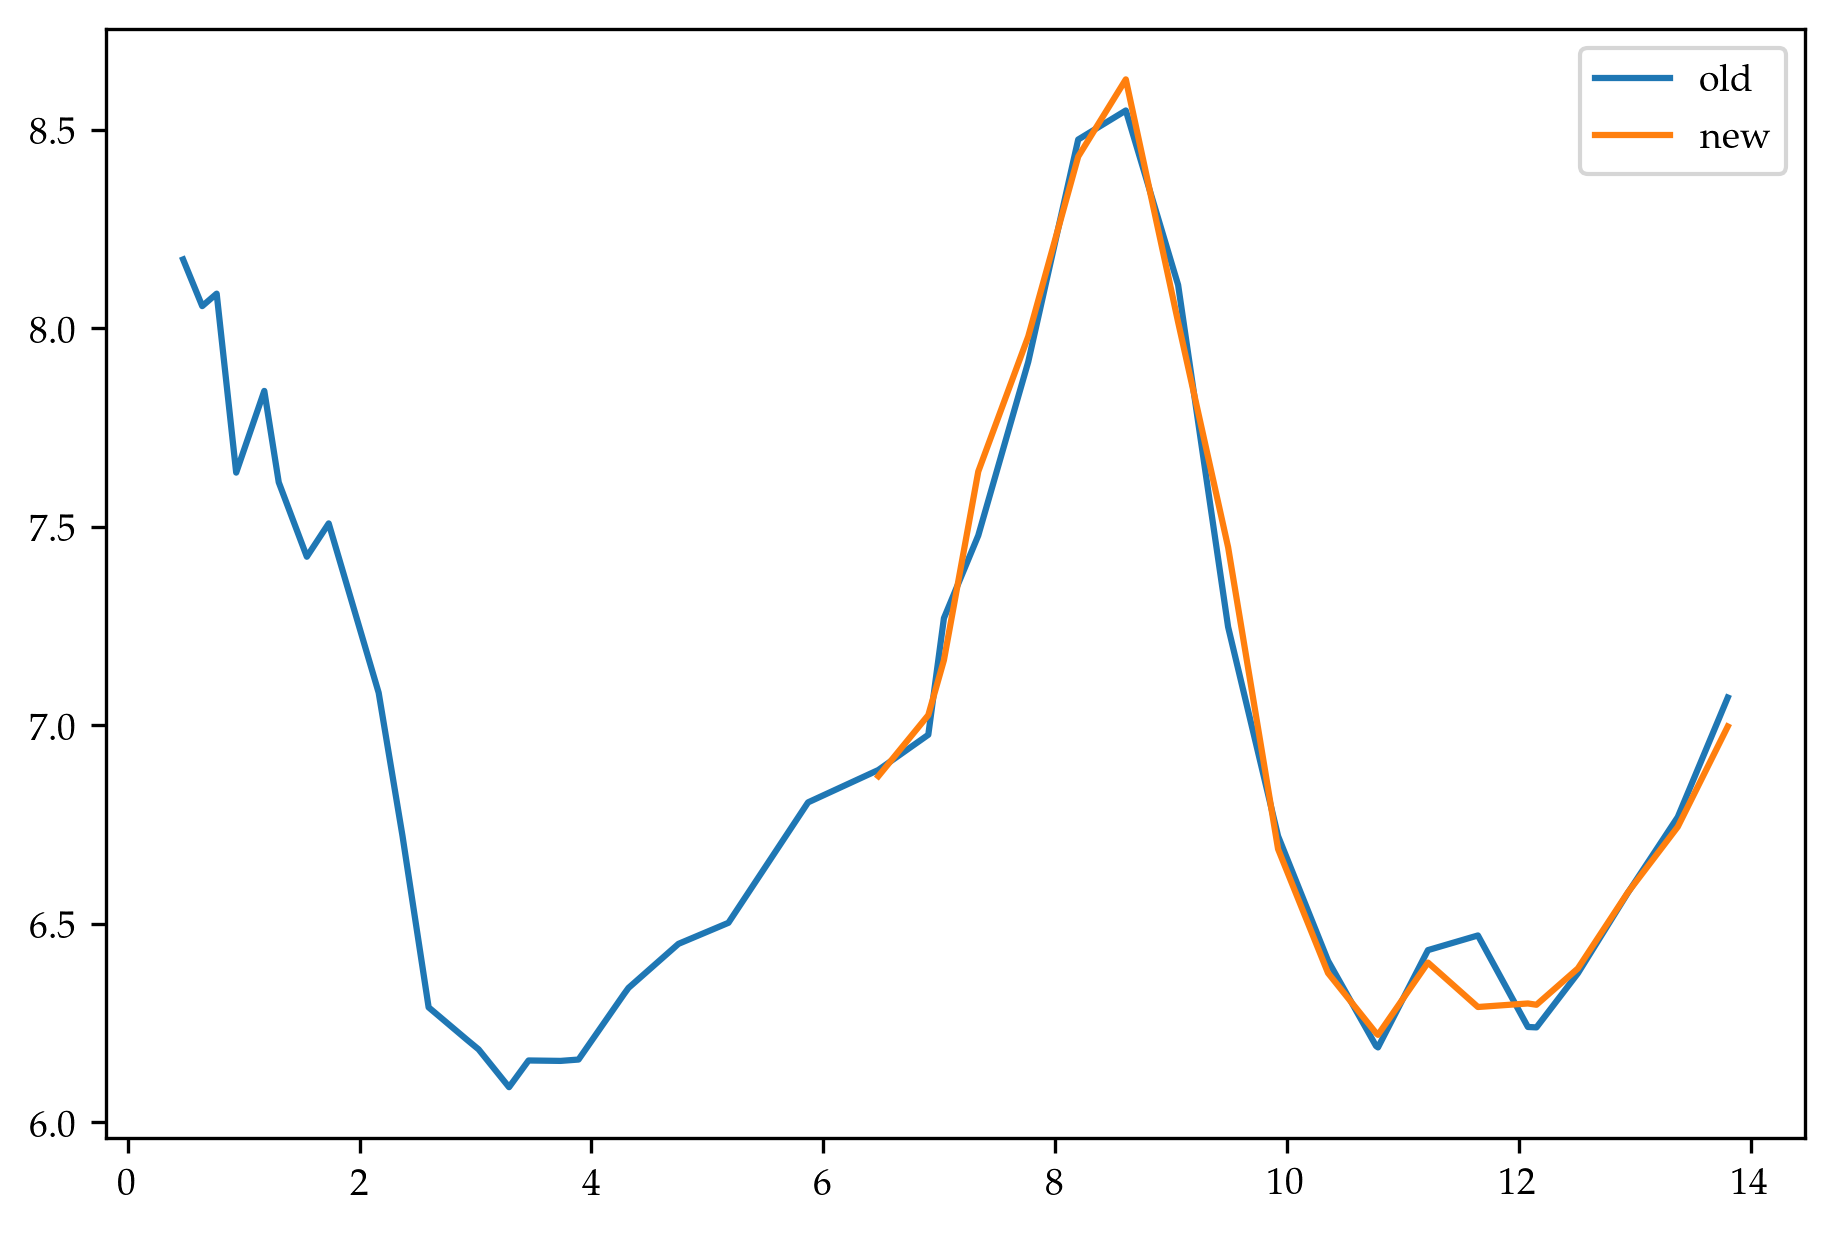

In [13]:
fig, ax = plt.subplots(1,1,dpi=300, constrained_layout=True)

plt.plot(t_old, np.log10(rp_old), label='old')
plt.plot(t_new, np.log10(rp_new), label='new')

plt.legend()
plt.show()